In [51]:
# Import all the modules
import pandas as pd
from rdkit.Chem import Descriptors
from rdkit import Chem
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [52]:
# Load the dataset
tox_df = pd.DataFrame()
tox_df = pd.read_csv("tox21_with_smiles.csv")

In [53]:
# See top 5 rows
tox_df.head()

,Unnamed: 0,index,ID,inchikey,sdftitle,order,set,CVfold,NR.AhR,NR.AR,...,NR.Aromatase,NR.ER,NR.ER.LBD,NR.PPAR.gamma,SR.ARE,SR.ATAD5,SR.HSE,SR.MMP,SR.p53,smiles
0,0,0,NCGC00178831-03,PEJLNXHANOHNSU-UHFFFAOYSA-N,NCGC00178831-03,0,training,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.Nc1ccc2cc3ccc(N...
1,1,1,NCGC00166114-03,SEACYXSIPDVVMV-UHFFFAOYSA-L,NCGC00166114-03,1,training,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,O=C([O-])c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(...
2,2,2,NCGC00263563-01,WQGJEAMPBSZCIF-VEKNOCPUSA-N,NCGC00263563-01,2,training,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,CO[C@@H]1[C@@H](OC)[C@H](C)[C@@](O)(CC(=O)[O-]...
3,3,3,NCGC00013058-02,CNYGFPPAGUCRIC-UHFFFAOYSA-L,NCGC00013058-02,3,training,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccccc2)c...
4,4,4,NCGC00167516-01,LYCYLGFSIXIXAB-NUZRHMIVSA-N,NCGC00167516-01,4,training,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC(=O)O.CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=...


In [54]:
# Get num of rows and columns
print(tox_df.shape)

(11759, 21)


In [55]:
# Test dataset
print(tox_df["NR.AhR"])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
11754    0.0
11755    0.0
11756    0.0
11757    1.0
11758    0.0
Name: NR.AhR, Length: 11759, dtype: float64


In [56]:
# How to assess toxicity??

# NR.AhR: Can indicate systemic toxicity and cancer risk.
# NR.AR and NR.AR.LBD: Related to endocrine disruption and reproductive toxicity.
# NR.Aromatase: Can indicate hormonal imbalances and reproductive effects.
# NR.ER and NR.ER.LBD: Associated with endocrine disruption and risk of hormone-related cancers.
# NR.PPAR.gamma: Involved in metabolic toxicity.
# SR.ARE: Marker for oxidative stress and organ-specific toxicity.
# SR.ATAD5: Indicates DNA damage and potential carcinogenicity.
# SR.HSE: Associated with cellular stress and cytotoxicity.
# SR.MMP: Related to tissue damage and organ dysfunction.
# SR.p53: Strong indicator of genotoxicity and cancer risk.



In [57]:
# Example: Load your dataset into a pandas DataFrame
# tox_df = pd.read_csv('tox21_data.csv')

# Define the columns related to toxicological concern
toxic_columns = [
    'NR.AhR',         # Aryl hydrocarbon receptor
    'NR.AR',          # Androgen receptor
    'NR.AR.LBD',      # Androgen receptor Ligand Binding Domain
    'NR.Aromatase',   # Aromatase
    'NR.ER',          # Estrogen receptor
    'NR.ER.LBD',      # Estrogen receptor Ligand Binding Domain
    'NR.PPAR.gamma',  # Peroxisome proliferator-activated receptor gamma
    'SR.ARE',         # Antioxidant response element
    'SR.ATAD5',       # DNA damage response (possibly unsafe if active)
    'SR.HSE',         # Heat shock element
    'SR.MMP',         # Matrix metalloproteinases
    'SR.p53'          # Tumor suppressor p53 (possibly unsafe if active)
]
     
print(tox_df[toxic_columns])


       NR.AhR  NR.AR  NR.AR.LBD  NR.Aromatase  NR.ER  NR.ER.LBD  \
0         NaN    NaN        NaN           NaN    NaN        NaN   
1         NaN    NaN        NaN           NaN    NaN        NaN   
2         NaN    NaN        NaN           NaN    NaN        NaN   
3         NaN    NaN        NaN           NaN    NaN        NaN   
4         NaN    0.0        NaN           NaN    NaN        NaN   
...       ...    ...        ...           ...    ...        ...   
11754     0.0    0.0        0.0           0.0    0.0        0.0   
11755     0.0    0.0        0.0           0.0    0.0        0.0   
11756     0.0    0.0        0.0           0.0    0.0        0.0   
11757     1.0    0.0        0.0           0.0    0.0        0.0   
11758     0.0    0.0        0.0           0.0    0.0        0.0   

       NR.PPAR.gamma  SR.ARE  SR.ATAD5  SR.HSE  SR.MMP  SR.p53  
0                NaN     NaN       NaN     0.0     NaN     NaN  
1                NaN     NaN       NaN     0.0     NaN     NaN  


In [58]:
# Count the number of empty values 

empty_dict = {}
empty_counter = 0

for i in toxic_columns:
    empty_counter = 0
    for j in tox_df[i]:
        if not j:
            empty_counter+=1
    empty_dict[i] = empty_counter

print(empty_dict)

{'NR.AhR': 7215, 'NR.AR': 8978, 'NR.AR.LBD': 8292, 'NR.Aromatase': 6862, 'NR.ER': 6757, 'NR.ER.LBD': 8303, 'NR.PPAR.gamma': 7958, 'SR.ARE': 6068, 'SR.ATAD5': 8749, 'SR.HSE': 7719, 'SR.MMP': 6175, 'SR.p53': 8093}


In [75]:

# Define a threshold for safety
# In this example, if any of the toxic columns is activated (i.e., has a value of 1),
# we classify the chemical as unsafe (0). Otherwise, it's safe (1).

# Create a new column 'safe_for_body' where:
# - If any of the toxicity-related assays are positive (1), it's unsafe (0).
# - If all are negative (0), it's safe (1).

# tox_df['safe_for_body'] = tox_df[toxic_columns].apply(lambda row: 0 if row.any() else 1, axis=1)

tox_inpute = tox_df.dropna(subset=toxic_columns)
tox_inpute['safe_for_body'] = tox_inpute[toxic_columns].apply(lambda row: 0 if row.any() else 1, axis=1)

# Print the first few rows to check
safe_count = 0

for i in tox_inpute["safe_for_body"]:
    if i == 1:
        safe_count+=1

print("number of chemical that is safe:", len(tox_inpute["safe_for_body"]))
print("number of chemical that is not safe: ", len(tox_inpute["safe_for_body"]) - safe_count)
print("Total number of chemical: ", safe_count)

number of chemical that is safe: 2542
number of chemical that is not safe:  373
Total number of chemical:  2169


/var/folders/3m/060_bbgs7pg8jq6cyzvjbmv40000gn/T/ipykernel_29759/2270776002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tox_inpute['safe_for_body'] = tox_inpute[toxic_columns].apply(lambda row: 0 if row.any() else 1, axis=1)


In [76]:
# Add new features
# Molecular weight
# Count the occurrences of each amino acid
# Count the total number of atoms, including carbon (C), hydrogen (H), oxygen (O), nitrogen (N), sulfur (S), etc.
# Count the number of aromatic rings
# logP
# ph, charge?
# number of hydrogen, covalent bond, diff bonds

def desc_calc(mol):
    mw = Descriptors.MolWt(mol)
    nn = 0
    
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() == 7:
            nn+=1
            
    nring = Descriptors.RingCount(mol)
    logP = Descriptors.MolLogP(mol)
    
    desc = {
    "mw":mw,
    "nn":nn,
    "nring":nring,
    "logP":logP,
    }
    
    return desc



In [77]:
# load smiles

mw_list = []
nn_list = []
nring_list = []
logP_list = []

for smi in tox_inpute["smiles"]:
    mol = Chem.MolFromSmiles(smi)
    desc = desc_calc(mol)
    
    mw_list.append(desc["mw"])
    nn_list.append(desc["nn"])
    nring_list.append(desc["nring"])
    logP_list.append(desc["logP"])
    
tox_inpute["mw"] = mw_list
tox_inpute["nn"] = nn_list
tox_inpute["nring"] = nring_list
tox_inpute["logP"] = logP_list

tox_inpute.head()
     

/var/folders/3m/060_bbgs7pg8jq6cyzvjbmv40000gn/T/ipykernel_29759/527937087.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tox_inpute["mw"] = mw_list
/var/folders/3m/060_bbgs7pg8jq6cyzvjbmv40000gn/T/ipykernel_29759/527937087.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tox_inpute["nn"] = nn_list
/var/folders/3m/060_bbgs7pg8jq6cyzvjbmv40000gn/T/ipykernel_29759/527937087.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,Unnamed: 0,index,ID,inchikey,sdftitle,order,set,CVfold,NR.AhR,NR.AR,...,SR.ATAD5,SR.HSE,SR.MMP,SR.p53,smiles,safe_for_body,mw,nn,nring,logP
7292,7292,7295,NCGC00258093-01,MEHHPFQKXOUFFV-OWSLCNJRSA-N,NCGC00258093-01,7295,training,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,C[C@]12C=CC3=C4CCC(=O)C=C4CC[C@H]3[C@@H]1CC[C@...,0,270.372,0,4,3.3293
7455,7455,7458,NCGC00258721-01,YIYBRXKMQFDHSM-UHFFFAOYSA-N,NCGC00258721-01,7458,training,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,O=C(c1ccccc1O)c1ccccc1O,0,214.220,0,2,2.3288
7469,7469,7472,NCGC00258764-01,NPAGDVCDWIYMMC-IZPLOLCNSA-N,NCGC00258764-01,7472,training,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@H]43)[C...,0,274.404,0,4,3.4891
7794,7794,7798,NCGC00254768-01,UELITFHSCLAHKR-UHFFFAOYSA-N,NCGC00254768-01,7798,training,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,CSC(=O)c1cccc2nnsc12,1,210.283,2,2,2.1945
7868,7868,7872,NCGC00256389-01,WBLZUCOIBUDNBV-UHFFFAOYSA-N,NCGC00256389-01,7872,training,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,O=C(O)CC[N+](=O)[O-],1,119.076,1,0,-0.2622


In [78]:
x_columns = ['mw',
             'nn',
             'nring',
             'logP']

In [79]:
# Preprocess the dataset
# x is new preprocess data, mw, nn, nring so on..
# y is the toxicity columns

x = tox_inpute.loc[:, x_columns].to_numpy()
y = tox_inpute.loc[:, 'safe_for_body'].to_numpy()

print("x shape: ", x.shape, "y_shape: ", y.shape)

# plt.scatter(x, y)

x shape:  (2542, 4) y_shape:  (2542,)


In [80]:
# Split the dataset 

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3300, train_size = 0.70, test_size= 0.30)

In [82]:
# Build the model
# start with logistic regression

log_reg_1 = LogisticRegression(solver='saga',max_iter=10000)
log_reg_1.fit(x_train,y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [86]:
# Test the accuracy of the set

y_pred = log_reg_1.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print("The accuracy of the prediction is {}".format(acc))

The accuracy of the prediction is 0.8401048492791612


In [202]:
from sklearn.metrics import mean_squared_error

##partition the data into training and validation randomly and plot the learning curve
# learning curve with increasing number of examples will help us evaluate the model behavior.

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=3300)
    train_errors = []
    val_errors=[]
    for m in range(3,len(x_train)):
        model.fit(X_train[:m,], y_train[:m])
        y_train_predict=model.predict(X_train[:m, :])
        y_val_predict=model.predict(X_val[:m, :])
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val[:m]))
    plt.axis([1,len(X_train),0,4])
    plt.plot(np.sqrt(train_errors),"r-+", label="train")
    plt.plot(np.sqrt(val_errors),"b-", label="val")

[[ 62.068    0.       0.      -1.029 ]
 [306.409    2.       3.       4.5488]
 [232.205    2.       1.       2.7989]
 [150.177    0.       1.       1.7497]
 [112.176    2.       3.      -0.3824]
 [236.274    2.       3.       3.3872]
 [160.216    0.       2.       2.6694]
 [335.831    1.       5.       1.9229]
 [140.569    0.       1.       2.0656]
 [207.229    1.       1.       1.6128]]
[1 1 1 1 1 1 0 0 1 0]


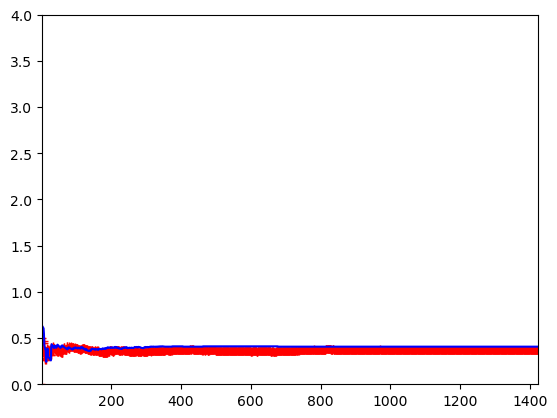

In [203]:
# Check the logistic

log_reg_2 = LogisticRegression()
log_reg_2.fit(x_test, y_test)

plot_learning_curves(log_reg_2, x_train, y_train)
print(x_train[:10,])
print(y_train[:10])

In [204]:
# Test the accuracy of the set

y_pred = log_reg_2.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print("The accuracy of the prediction is {}".format(acc))

The accuracy of the prediction is 0.8401048492791612


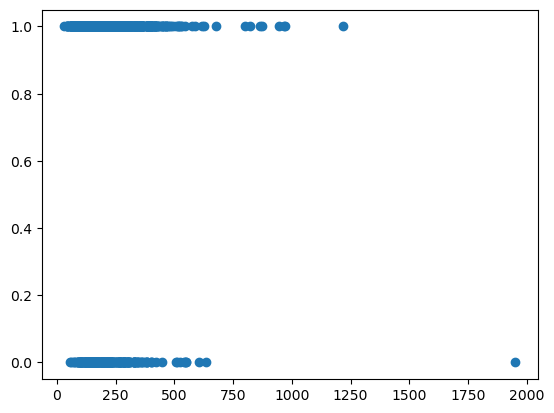

In [205]:
plt.scatter(x_train[:, 0], y_train)